In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sn 
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.offline as pyo
from sklearn import preprocessing


In [2]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [3]:
normalized_tracks_df_withIndex = pd.read_csv("normalized_tracks_df_withIndex.csv",index_col=[0])

In [4]:
normalized_tracks_df_withIndex.head()

,title,artist,year,bpm,energy,danceability,dB,liveness,valence,duration,acousticness,speechiness,popularity
0,flowers,miley cyrus,1.00000,0.38411,0.65957,0.66250,0.77778,0.01220,0.65591,0.14834,0.06122,0.08929,1.00000
1,cupid - twin ver.,fifty fifty,1.00000,0.39735,0.56383,0.75000,0.55556,0.40244,0.74194,0.10297,0.44898,0.01786,0.98925
2,beso,rosalía,1.00000,0.23179,0.61702,0.73750,0.61111,0.18293,0.52688,0.13962,0.75510,0.21429,0.97849
3,boy's a liar pt. 2,pinkpantheress,1.00000,0.48344,0.79787,0.65000,0.55556,0.28049,0.88172,0.02792,0.25510,0.05357,0.97849
4,creepin' (with the weeknd & 21 savage),metro boomin,0.97368,0.25166,0.59574,0.67500,0.66667,0.07317,0.13978,0.18674,0.42857,0.05357,0.97849


In [5]:
tr3=pd.pivot_table(normalized_tracks_df_withIndex, index=['title','artist'])
tr3_csr=csr_matrix(tr3.values)
tr3.reset_index(inplace=True)

In [6]:
model = NearestNeighbors(metric="cosine", algorithm ="brute")
model.fit(tr3_csr)

NearestNeighbors(algorithm='brute', metric='cosine')

In [7]:
title ="Yellow"
artist="ColdPlay"


In [8]:
def recommendation(title:str, artist:str):
    """ This is a method that recommends similar songs 
                Args:
                    title: title of song
                    artist: name of the artist for the song
                Returns:
                    result: title and artist name of songs that is simlar 
                    suggestions: index for the title and artist name of songs that is simlar
    """
    title=title.lower()
    artist = artist.lower()
    selected=tr3.loc[tr3.artist.str.contains(artist) & tr3.title.str.contains(title),:]

    distance, suggestions = model.kneighbors(selected.iloc[0,2:].values.reshape(1,-1),n_neighbors=10)
    result = [(tr3.iloc[suggestions.flatten()[i],0], tr3.iloc[suggestions.flatten()[i],1]) for i in range(len(suggestions.flatten()))]
    # print(distance)
    print(distance.flatten())
    print(suggestions)
    print(result)
    return result, suggestions

In [9]:
result, suggestions =recommendation(title, artist)

[0.         0.01401151 0.01595597 0.01747942 0.01761283 0.01761299
 0.02056184 0.02234085 0.02306142 0.0244975 ]
[[2171 1722  836  739 1276  919  894  760 1873  804]]
[('yellow', 'coldplay'), ('somewhere only we know', 'keane'), ('i hope you dance', 'lee ann womack'), ('here without you', '3 doors down'), ('my love', 'westlife'), ('in my place', 'coldplay'), ("i'm with you", 'avril lavigne'), ('higher', 'creed'), ('the climb', 'miley cyrus'), ('how you remind me', 'nickelback')]


In [10]:

suggestions= suggestions.flatten()

In [11]:
def visualisation(data:pd.DataFrame, suggestions_loc:list):
    """ This is a method that recommends similar songs 
                Args:
                    title: title of song
                    artist: name of the artist for the song
                Returns:
                    result: title and artist name of songs that is simlar 
                    suggestions: index for the title and artist name of songs that is simlar
    """
    radar_chart_data =data.iloc[suggestions_loc,:].copy()
    radar_chart_data['ForClosing'] =radar_chart_data['acousticness']

    categories = list (radar_chart_data.columns)[2:]
    categories[-1] = categories[0]
    categories

    angles = np.linspace(0, 2*np.pi, len(categories)-1, endpoint=False)
    # data = np.concatenate((data, [data[0]]))
    angles = np.concatenate((angles,[angles[0]])) 

    fig = plt.figure(figsize=(8,8))
    ax  = fig.add_subplot(111, polar=True)
    for i in range(5):
        data = radar_chart_data.iloc[i,2:].values
        ax.plot(angles, data, 'o-', linewidth=2, label=radar_chart_data.iloc[i,0].title())
        ax.fill(angles, data, alpha=0.05)

    ax.legend(bbox_to_anchor=(1.4,1.2), title="Songs")
    ax.set_thetagrids(angles*180/np.pi, labels=categories, fontsize=12, ha='center')
    ax.set_title(f"Comparison of Songs with \n  {radar_chart_data.iloc[0,0].title()}", fontsize=18, loc='left')
    ax.grid(True)



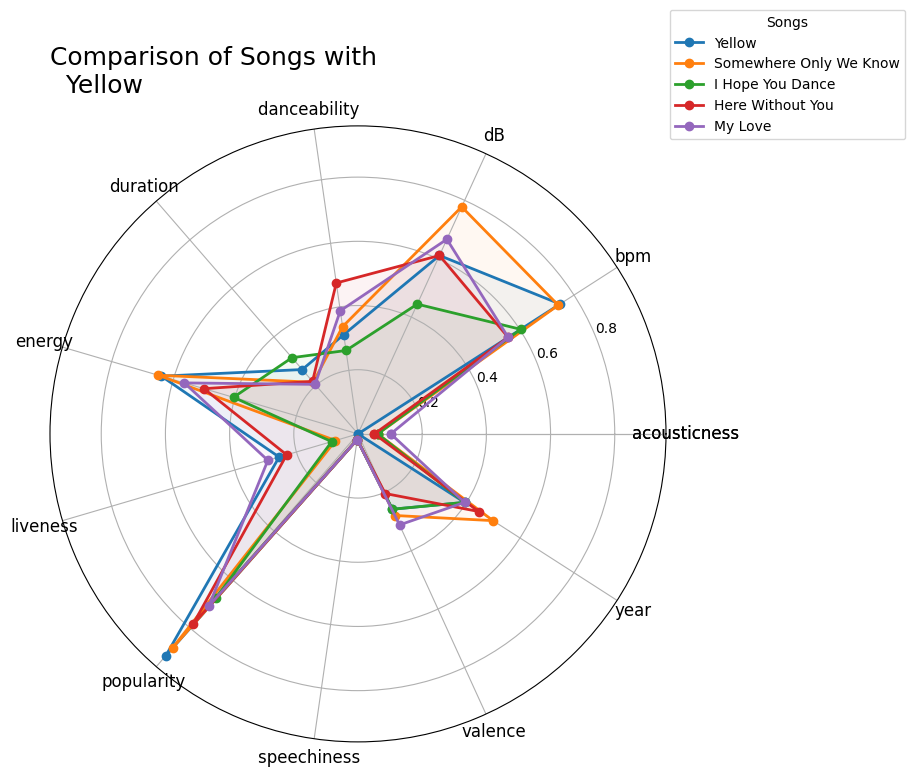

In [12]:
visualisation(tr3,suggestions)

Resource:

https://www.kaggle.com/datasets/conorvaneden/best-songs-on-spotify-for-every-year-2000-2023

https://www.kaggle.com/datasets/lehaknarnauli/spotify-datasets?select=tracks.csv

https://www.kaggle.com/code/typewind/draw-a-radar-chart-with-python-in-a-simple-way/notebook

https://everydaycodings.medium.com/anime-recommendation-system-collaborative-method-ca3e84ee41a0

https://medium.com/swlh/spotify-song-prediction-and-recommendation-system-b3bbc71398ad
